## Python Basic

In [1]:
a = 3
b = 2
a + b

5

## GET

In [2]:
import requests
res = requests.get('https://www.re.org.tw/news/default.aspx?cid=219')
res

<Response [200]>

In [4]:
#res.text

## POST

In [9]:
import requests
url = 'https://www.thsrc.com.tw/TimeTable/Search'
payload = {
'SearchType': 'S',
'Lang': 'TW',
'StartStation': 'TaiPei',
'EndStation': 'XinZhu',
'OutWardSearchDate': '2020/08/13',
'OutWardSearchTime': '15:00',
'ReturnSearchDate': '2020/08/13',
'ReturnSearchTime': '15:00',
}
res = requests.post(url, data = payload)

In [10]:
res

<Response [200]>

In [13]:
#res.text
#res.json()

In [14]:
import requests
res = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')
with open('zhiyu.png', 'wb') as f:
  f.write(res.content)

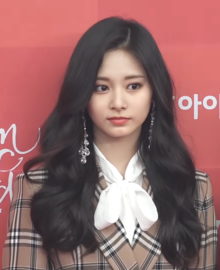

In [15]:
from PIL import Image
Image.open('zhiyu.png')

## Data Parsing

In [16]:
html_sample = ''' <html> <body> <h1 id="title">Hello World</h1> <a href="#" class="link">This is link1</a> <a href="# link2" class="link">This is link2</a> </body> </html>'''

In [17]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_sample, 'lxml')

In [18]:
soup.text

'  Hello World This is link1 This is link2  '

In [19]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [20]:
soup.select_one('h1').text

'Hello World'

In [21]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [22]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [23]:
for alink in soup.select('a'):
  print(alink.text)

This is link1
This is link2


In [24]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [25]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [26]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [27]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [28]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [29]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [31]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [32]:
soup.select('body .link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [34]:
for link in soup.select('body .link'):
  print(link.get('href'))

#
# link2


## 再生能源資訊網列表爬取

In [35]:
import requests
res = requests.get('https://www.re.org.tw/news/default.aspx?cid=198')
res

<Response [200]>

In [37]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [39]:
soup.select('.content-box-list li a')

[<a href="/news/more.aspx?cid=198&amp;id=3574" title="樹電共生！奇美太陽能電廠今啟用 年發電兩千萬度">
 <span class="date">2020/8/12</span>
 <h3 class="tit">樹電共生！奇美太陽能電廠今啟用 年發電兩千萬度</h3>
 </a>,
 <a href="/news/more.aspx?cid=198&amp;id=3565" title="台中文山綠光計畫種太陽能板 2年發1397萬度電">
 <span class="date">2020/8/4</span>
 <h3 class="tit">台中文山綠光計畫種太陽能板 2年發1397萬度電</h3>
 </a>,
 <a href="/news/more.aspx?cid=198&amp;id=3564" title="全球半導體企業第一家 台積電加入RE100 承諾100％使用再生能源">
 <span class="date">2020/8/3</span>
 <h3 class="tit">全球半導體企業第一家 台積電加入RE100 承諾100％使用再生能源</h3>
 </a>,
 <a href="/news/more.aspx?cid=198&amp;id=3557" title="台塑集團麥寮風力發電投資為綠能佈局助威">
 <span class="date">2020/7/28</span>
 <h3 class="tit">台塑集團麥寮風力發電投資為綠能佈局助威</h3>
 </a>,
 <a href="/news/more.aspx?cid=198&amp;id=3548" title="上半年僑外投資 風電最威">
 <span class="date">2020/7/21</span>
 <h3 class="tit">上半年僑外投資 風電最威</h3>
 </a>,
 <a href="/news/more.aspx?cid=198&amp;id=3542" title="亞洲首例！台電結合民間打造虛擬電廠 特斯拉電池助陣">
 <span class="date">2020/7/17</span>
 <h3 class="tit">亞洲首例！台電結合民間打造虛擬電廠 特斯拉電

In [52]:
domain = 'https://www.re.org.tw'
for rec in soup.select('.content-box-list li a'):
  title = rec.select_one('h3').text
  dt   = rec.select_one('.date').text
  link  = domain + rec.get('href')
  #print(rec)
  print(title, dt, link)
  print('===================================')

樹電共生！奇美太陽能電廠今啟用 年發電兩千萬度 2020/8/12 https://www.re.org.tw/news/more.aspx?cid=198&id=3574
台中文山綠光計畫種太陽能板 2年發1397萬度電 2020/8/4 https://www.re.org.tw/news/more.aspx?cid=198&id=3565
全球半導體企業第一家 台積電加入RE100 承諾100％使用再生能源 2020/8/3 https://www.re.org.tw/news/more.aspx?cid=198&id=3564
台塑集團麥寮風力發電投資為綠能佈局助威 2020/7/28 https://www.re.org.tw/news/more.aspx?cid=198&id=3557
上半年僑外投資 風電最威 2020/7/21 https://www.re.org.tw/news/more.aspx?cid=198&id=3548
亞洲首例！台電結合民間打造虛擬電廠 特斯拉電池助陣 2020/7/17 https://www.re.org.tw/news/more.aspx?cid=198&id=3542
雙重台灣之光！沃旭與台積電簽署全球最大再生能源購電契約 2020/7/8 https://www.re.org.tw/news/more.aspx?cid=198&id=3534
離岸風電籌資順 台灣ESG跨大步 2020/7/7 https://www.re.org.tw/news/more.aspx?cid=198&id=3532
建置金門成智慧低碳示範島 台電盼複製成功經驗 2020/7/1 https://www.re.org.tw/news/more.aspx?cid=198&id=3526
台積電擴大使用再生能源 今年太陽能預計發電量可達527萬度 2020/6/30 https://www.re.org.tw/news/more.aspx?cid=198&id=3524


## 抓取新聞內文

In [55]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.re.org.tw/news/more.aspx?cid=198&id=3574')
soup = BeautifulSoup(res.text, 'lxml')
#res.text

In [58]:
soup.select_one('.content-box-article').text.strip()

'2020-08-11 14:44 聯合報 / 記者周宗禎／台南即時報導\n\n\n\n\n\r\n奇美實業打造台南善化閒置工廠用地成「奇美綠能園區」，設置年發電量兩千萬度太陽能電廠，今天啟用。區內保存超過2萬2000棵樹是「工業、生態、景觀平衡的樹電共生園區」，年減碳達1萬2000公噸。\n\r\n奇美強調，最大限度保留原生樹木與植被設置太陽能電廠，雖然「樹電共生」增加後續維運成本，犧牲20%以上發電效益，「成就最美的療癒電廠」。\n\r\n奇美邀請台南市長黃偉哲、經濟部能源局長游振偉、工業局長呂正華與台電等單位首長，及建置廠商友達光電參與啟用儀式，「見證奇美六十周年獻給地球的永續禮物，為社會與環境貢獻的環保決心」。\n\r\n奇美實業董事長許春華說，這座園區誕生充份實踐奇美對環境的永續承諾，也讓奇美在響應低碳城市與再生能源發展上盡一分心力。推動綠能發展不但是善盡企業社會責任，更是對企業永續競爭力的投資。將走入下一個60年的奇美，希望透過綠能園區傳遞奇美的Clean & Green綠色願景，並投入更多綠色創新，力求把潔淨與綠色元素貫穿在企業每個環節中。\n\r\n他說，太陽能電廠設計初始即規畫三個樹林保留區並設置環廠行道樹，也將需移植的樹木轉贈關係企業，堅決不傷害任何一棵樹。電廠在建置時更放棄傳統的混凝土基樁，而採用鋼樁工法，以及全區地面不鋪柏油。雖然增加了投資成本及後續維運成本，但奇美堅持要讓土地呼吸，讓未來土地復育零負擔。奇美實業充分善用綠色科技樹電共生，透過這座有別於傳統、花木扶疏的綠能電廠，療癒自然，也療癒人心。\n\r\n奇美實業總經理趙令瑜表示，奇美目前綠電建置容量已經達22MW，相當提供8100戶家庭全年用電。除綠電還有許多綠色創新專案在進行，完成後奇美會有80%電力可自給自足，而且是來自潔淨能源，並達成36%的減碳效益。\n\r\n奇美實業利用舊建築物與回收建材，打造以綠能及樹木為主題的「奇美綠能館」，展示綠能主題知識與園區樹木生態系介紹及奇美願景意涵，將定期舉辦科普夏令營，讓孩子了解綠色能源及永續環境的重要。'

In [59]:
def getArticle(url):
  res = requests.get(url)
  soup = BeautifulSoup(res.text, 'lxml')
  return soup.select_one('.content-box-article').text.strip()

In [60]:
getArticle('https://www.re.org.tw/news/more.aspx?cid=198&id=3542')

'2020-07-17 11:09經濟日報 記者葉卉軒／台北即時報導\n\n\n\n\n\n\n\r\n台電今（17）日宣布攜手民間企業打造「亞洲首例」的電力頻率調整儲能系統輔助服務，預計最快今年底可上線，此次是跳脫既有蓋電廠買機組的運轉思維，結合民間儲能系統協助電網頻率自動控制，有如蓋了座「虛擬電廠」，1秒可提供15MW（百萬瓦）電力，調頻效果比大型機組更快上3至5倍，讓供電更穩定，還可提升既有機組運轉效率、減少空汙排放。\n\r\n此外，台電也同步推動「輔助服務交易試行平台」，預計明年第一季上線，未來將持續聯手民間擴大儲能系統電力輔助服務，持續提升供電穩定。\n\r\n台電指出，為兼顧能源轉型、再生能源增加及民眾穩定用電，台電必須讓電力系統在用電、發電供給之間分秒保持動態平衡，隨時維持60赫茲（Hz）頻率，過去當有突發電力變化，皆由大型發電機組輔助頻率控制，如今台電則是攜手民間企業打造「亞洲首例」電力頻率調整儲能系統。\n\r\n台電今年首度對外開辦「儲能自動頻率控制（AFC）調頻備轉輔助服務」採購，藉由集結民間多元儲能資源與智慧，促進電網系統效率、調度彈性再進化，期間吸引共30家業者投標，甫於7月決標，最終由5家廠商得標共15MW容量，其中儲能電池供應商包含：特斯拉（Tesla）、能元科技、三星及歐美等國內外大廠設備。\n\r\n台電表示，電力需求瞬息萬變，電力調度不只是讓發電量大於用電量，還需配合如酷暑瞬間用電尖峰，或是太陽下山時太陽光電減少等多元情況變化即時升降載，維持系統頻率穩定，以免因系統失衡導致停電。\n\r\n台電指出，既有電力系統調頻皆由台電各電廠發電機組輔助，並透過中央電力調度中心統一集中調度，在民間儲能系統加入輔助服務供應行列後，如同新增一座「虛擬電廠」，這些分散設置各地的併網型儲能系統可智慧輔助電網，自行追隨電力系統60赫茲頻率變化，1秒鐘內即可放出15MW電力，執行充放電工作，瞬間幫助頻率回穩，更可儲存2萬度電力。\n\r\n而台電後續將依儲能系統每秒偵測頻率及反應情形，以及自動回傳的儲能系統狀態等電力輔助服務執行情況，給予服務費用。\n\r\n台電表示，國際間英國曾以儲能系統協助電網頻率控制，去年8月大停電時發揮「神救援」效果，避免更大範圍、更長時間的停電發生。\n\r\n台電此次儲能系統輔助服務則是亞洲首例，預計最快今年底可上線，加入

## 完整網路爬蟲

In [ ]:
def getArticle(url):
  res = requests.get(url)
  soup = BeautifulSoup(res.text, 'lxml')
  return soup.select_one('.content-box-article').text.strip()

In [61]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.re.org.tw/news/default.aspx?cid=198')
soup = BeautifulSoup(res.text, 'lxml')
domain = 'https://www.re.org.tw'

newsary = []
for rec in soup.select('.content-box-list li a'):
  title = rec.select_one('h3').text
  dt   = rec.select_one('.date').text
  link  = domain + rec.get('href')
  content = getArticle(link)
  newsary.append({'標題':title, '時間':dt, '連結':link, '內文': content})

In [62]:
len(newsary)

10

In [63]:
newsary[0]

{'內文': '2020-08-11 14:44 聯合報 / 記者周宗禎／台南即時報導\n\n\n\n\n\r\n奇美實業打造台南善化閒置工廠用地成「奇美綠能園區」，設置年發電量兩千萬度太陽能電廠，今天啟用。區內保存超過2萬2000棵樹是「工業、生態、景觀平衡的樹電共生園區」，年減碳達1萬2000公噸。\n\r\n奇美強調，最大限度保留原生樹木與植被設置太陽能電廠，雖然「樹電共生」增加後續維運成本，犧牲20%以上發電效益，「成就最美的療癒電廠」。\n\r\n奇美邀請台南市長黃偉哲、經濟部能源局長游振偉、工業局長呂正華與台電等單位首長，及建置廠商友達光電參與啟用儀式，「見證奇美六十周年獻給地球的永續禮物，為社會與環境貢獻的環保決心」。\n\r\n奇美實業董事長許春華說，這座園區誕生充份實踐奇美對環境的永續承諾，也讓奇美在響應低碳城市與再生能源發展上盡一分心力。推動綠能發展不但是善盡企業社會責任，更是對企業永續競爭力的投資。將走入下一個60年的奇美，希望透過綠能園區傳遞奇美的Clean & Green綠色願景，並投入更多綠色創新，力求把潔淨與綠色元素貫穿在企業每個環節中。\n\r\n他說，太陽能電廠設計初始即規畫三個樹林保留區並設置環廠行道樹，也將需移植的樹木轉贈關係企業，堅決不傷害任何一棵樹。電廠在建置時更放棄傳統的混凝土基樁，而採用鋼樁工法，以及全區地面不鋪柏油。雖然增加了投資成本及後續維運成本，但奇美堅持要讓土地呼吸，讓未來土地復育零負擔。奇美實業充分善用綠色科技樹電共生，透過這座有別於傳統、花木扶疏的綠能電廠，療癒自然，也療癒人心。\n\r\n奇美實業總經理趙令瑜表示，奇美目前綠電建置容量已經達22MW，相當提供8100戶家庭全年用電。除綠電還有許多綠色創新專案在進行，完成後奇美會有80%電力可自給自足，而且是來自潔淨能源，並達成36%的減碳效益。\n\r\n奇美實業利用舊建築物與回收建材，打造以綠能及樹木為主題的「奇美綠能館」，展示綠能主題知識與園區樹木生態系介紹及奇美願景意涵，將定期舉辦科普夏令營，讓孩子了解綠色能源及永續環境的重要。',
 '時間': '2020/8/12',
 '標題': '樹電共生！奇美太陽能電廠今啟用 年發電兩千萬度',
 '連結': 'https://www.re.org.tw/news/more.aspx?cid=198&id=3

In [64]:
import pandas
newsdf = pandas.DataFrame(newsary)

In [66]:
newsdf.to_excel('news.xlsx')